## Import Libraries and Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics



In [2]:
# Import Data
data = pd.read_csv('nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Data Analysis and Processing

In [3]:
data.shape

(481, 31)

In [4]:
# Name of all the columns
data.columns.values

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [5]:
# Drop fields which are not required for the model
df = data.drop(['player', 'pos', 'bref_team_id', 'season', 'season_end'], axis = 1)
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [6]:
# Check for null values
df.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

#### fg. , x3p. , x2p. , efg. , and ft. have NULL values some rows.

In [7]:
# Fill NULL values with mean

df["fg."].fillna(df["fg."].mean(),inplace=True)
df["x3p."].fillna(df["x3p."].mean(),inplace=True)
df["x2p."].fillna(df["x2p."].mean(),inplace=True)
df["efg."].fillna(df["efg."].mean(),inplace=True)
df["ft."].fillna(df["ft."].mean(),inplace=True)

df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [8]:
# Normalize the data
df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494


In [9]:
# Split data in training and test set

x = df              # Input features
y = df['pts']       # Output feature

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

print("Number of fields in Training data = ",len(x_train))
print("Number of fields in Testing data = ",len(x_test))

Number of fields in Training data =  336
Number of fields in Testing data =  145


In [10]:
x_test.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
198,0.35,0.926829,0.939024,0.788209,0.474676,0.550948,0.433,0.153257,0.186992,0.347826,...,0.761,0.070455,0.356322,0.278276,0.276006,0.267016,0.146119,0.383051,0.582418,0.416892
126,0.40,0.609756,0.207317,0.215956,0.085984,0.112559,0.384,0.118774,0.165854,0.303922,...,0.735,0.040909,0.088123,0.078097,0.094313,0.099476,0.022831,0.115254,0.296703,0.077902
310,0.20,0.987805,1.000000,0.861583,0.593640,0.601303,0.497,0.000000,0.001626,0.000000,...,0.657,0.581818,0.643678,0.682226,0.237171,0.476440,0.214612,0.562712,0.750916,0.481681
26,0.35,0.878049,0.121951,0.304710,0.118963,0.103081,0.580,0.000000,0.000000,0.285111,...,0.691,0.202273,0.215837,0.231598,0.083218,0.068063,0.114155,0.213559,0.534799,0.092557
129,0.05,0.975610,0.987805,0.838834,0.564193,0.455569,0.623,0.000000,0.003252,0.000000,...,0.418,1.000000,0.805875,0.961400,0.048544,0.528796,0.598174,0.372881,1.000000,0.422291


In [11]:
y_test.head()

198    0.416892
126    0.077902
310    0.481681
26     0.092557
129    0.422291
Name: pts, dtype: float64

## Model

In [12]:
# Check for increasing neighbour values to see which has the highest regression score
r_score = {}

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("r2 score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)
    r_score[k_value] = r2_score(y_test, y_pred)


k = max(r_score, key= lambda x: r_score[x])
print("\nThe highest r2 score is for k_value =", k)

r2 score is: 0.9299 for k_value: 1
r2 score is: 0.9472 for k_value: 2
r2 score is: 0.9568 for k_value: 3
r2 score is: 0.9623 for k_value: 4
r2 score is: 0.9605 for k_value: 5
r2 score is: 0.9585 for k_value: 6
r2 score is: 0.9576 for k_value: 7
r2 score is: 0.9593 for k_value: 8
r2 score is: 0.9568 for k_value: 9
r2 score is: 0.9536 for k_value: 10

The highest r2 score is for k_value = 4


In [13]:
# Fit the model with training data
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(x_train, y_train)       

# Predictions
y_pred = knn.predict(x_test)     

print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0012986
Regression score is: 0.9623


In [14]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.416892,0.399055
1,0.077902,0.097860
2,0.481681,0.439645
3,0.092557,0.132279
4,0.422291,0.371577
...,...,...
140,0.130737,0.130255
141,0.061319,0.053799
142,0.183957,0.201022
143,0.330120,0.363093


In [15]:
# Difference between predicted and true value 
dif = abs(y_pred-y_test)
print("Mean of differences : ", np.mean(dif))
print("Median of differences : ", np.median(dif))

Mean of differences :  0.023222335997446705
Median of differences :  0.015522560740455105


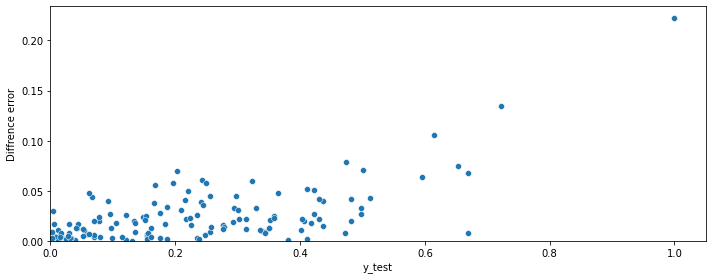

In [16]:
# Scatter-plot of yy
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = y_test, y = dif)

plt.xlabel('y_test')
plt.ylabel('Diffrence error')

plt.xlim(0)
plt.ylim(0)
plt.show()

- ##### Here the x-axis shows the values of y_test and the y-axis shows the difference error. It can be observed that the error is higher for higher values of y_test. 
- ##### The possible reason for this can be beacuse of fewer datapoints with high y_test in our dataset.